Hier:
- ermittelte Parameter testen

In [1]:
from tensorflow.keras.datasets import mnist
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  


In [2]:
# 1. MNIST Datensatz aus keras laden
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# 2. Das Shape des Datensatzes ausgeben
print("Ursprungs Shape des Trainingsdatensatzes:", x_train.shape)
print("Ursprungs Shape des Testdatensatzes:", x_test.shape)

Ursprungs Shape des Trainingsdatensatzes: (60000, 28, 28)
Ursprungs Shape des Testdatensatzes: (10000, 28, 28)


In [4]:
# 3. Den Datensatz für ein SVM vorbereiten
# Flatten der Bildmatrizen für die SVM (von 28x28 zu 784)
x_train_svm = x_train.reshape((x_train.shape[0], -1))
x_test_svm = x_test.reshape((x_test.shape[0], -1))
# Standardisierung der Feature-Werte
scaler = StandardScaler()
x_train_svm = scaler.fit_transform(x_train_svm)
x_test_svm = scaler.transform(x_test_svm)

In [5]:
# 5. Das Shape des Datensatzes ausgeben
print("SVM Shape des Trainingsdatensatzes:", x_train_svm.shape)
print("SVM Shape des Testdatensatzes:", x_test_svm.shape)

SVM Shape des Trainingsdatensatzes: (60000, 784)
SVM Shape des Testdatensatzes: (10000, 784)


In [6]:
# 6. Das SVM Modell definieren und trainieren

svc = svm.LinearSVC()

svc.fit(x_train_svm, y_train)

c:\Users\micha\CODE\ml_algorithms\venv_ml\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\micha\CODE\ml_algorithms\venv_ml\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [9]:
# 7. Das SVM Modell auf den Testdaten evaluieren

result = svc.predict(x_test_svm)

print(classification_report(y_test, result))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       980
           1       0.95      0.98      0.96      1135
           2       0.91      0.87      0.89      1032
           3       0.89      0.89      0.89      1010
           4       0.91      0.93      0.92       982
           5       0.88      0.87      0.87       892
           6       0.92      0.95      0.93       958
           7       0.93      0.90      0.91      1028
           8       0.86      0.86      0.86       974
           9       0.89      0.87      0.88      1009

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [14]:
 some_digit_scores = svc.decision_function([x_test_svm[0]])
 print(some_digit_scores)

[[ 2.78183839 -0.30750678  5.84312222  8.29483169  1.70401201  4.81397367
   0.6926521   9.31881645  3.81347015  7.29344822]]


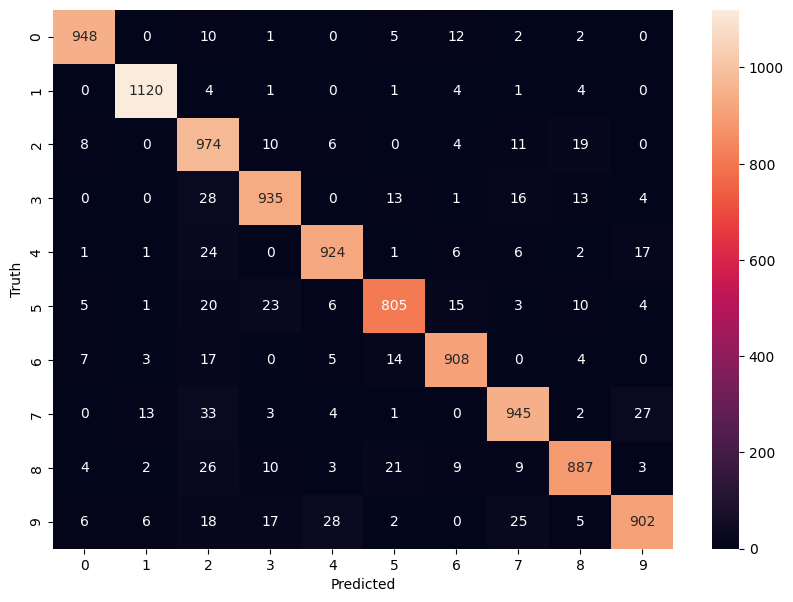

In [9]:
# Auswertung

cm = confusion_matrix(y_test, result)

plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

NameError: name 'fig' is not defined

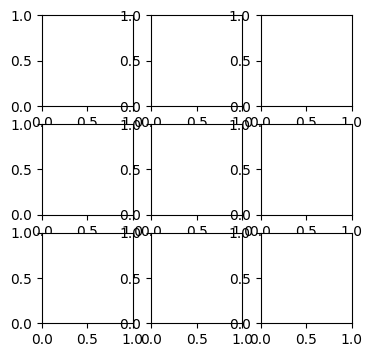

In [10]:
# Plotting some true predictions

fig, axes = plt.subplots(3, 3, figsize=(4, 4))
fig.subplots_adjust(hspace=0.8, wspace=0.5)  # Adjust the spacing between images
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[i], cmap='gray')
    ax.set_title(f'Truth: {y_test[i]}\nPredicted: {result[i]}')
    ax.axis('off')
plt.show()

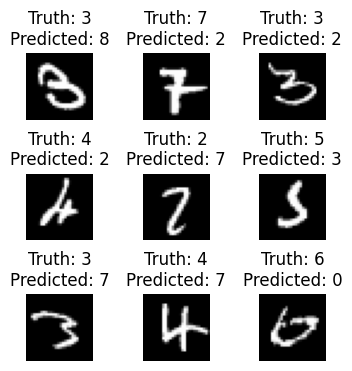

In [ ]:
# Plotting some false predictions

count = 0
mismatched_entries = []
for i in range(len(result)):
    if result[i] != y_test[i]:
        mismatched_entries.append((result[i], y_test[i], x_test[i]))
        count += 1
    if count == 9:
        break

fig, axes = plt.subplots(3, 3, figsize=(4, 4))
fig.subplots_adjust(hspace=0.8, wspace=0.5)  # Adjust the spacing between images
for i, ax in enumerate(axes.flat):
    ax.imshow(mismatched_entries[i][2], cmap='gray')
    ax.set_title(f'Truth: {mismatched_entries[i][1]}\nPredicted: {mismatched_entries[i][0]}')
    ax.axis('off')
plt.show()

In [ ]:
# Speichern des Modells

joblib.dump(svc, 'models/svm_v1_model.pkl')

['models/svm_v1_model.pkl']